<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/01_Generalized_Linear_Models/02-01-06-03-poisson-regression-overdispersion-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 6.3. Poisson Regression Models for Overdispersed Data

When analyzing count data, you may encounter overdispersion, which occurs when the observed variability in the data is more significant than what a standard Poisson model would predict. Overdispersion often arises in real-world datasets because natural processes can introduce more variability than a simple Poisson model can accommodate. Ignoring overdispersion can lead to underestimated standard errors, unreliable confidence intervals, and misleading conclusions.

In this tutorial, we will explore methods for modeling overdispersed count data in R, focusing on approaches such as quasi-Poisson and negative binomial models, which can manage the extra variability in the data. We will begin by discussing the implications of overdispersion, then move on to fitting models from scratch and using R’s `glm()` function. After that, we’ll examine model diagnostics to detect overdispersion, evaluate the models to ensure a proper fit, and interpret incidence rate ratios (IRRs).


## Overview

**Poisson regression** is used to model count data where the response variable represents the number of occurrences of an event. A key assumption of the Poisson model is that the **mean** and the **variance** of the response variable are equal:

$$ \text{Var}(Y) = \mu $$

Where $(Y)$ is the count response variable, and $\mu$ is the mean (expected value) of the counts. However, in many real-world datasets, this assumption is often violated. When the variance is **greater than the mean**, the data exhibit **overdispersion**. Overdispersion can lead to underestimated standard errors and, as a result, inflated Type I error rates (i.e., falsely concluding that a predictor is significant).





### Causes of Overdispersion

Overdispersion in count data can occur for several reasons, including:

1.  **Unobserved heterogeneity**: There might be additional variables or factors influencing the count data that are not included in the model.

2.  **Zero-inflation**: There might be an excess of zeros in the data compared to what the Poisson model predicts.

3.  **Clustering**: Observations within clusters may be more similar than those across clusters, leading to greater variability than assumed.


### Identifying Overdispersion

-   The variance is much greater than the mean, which suggests that we will have **over-dispersion** in the model.

-   **Deviance**: If the deviance is much larger than the degrees of freedom, it suggests overdispersion. We can estimate a dispersion parameter, $ϕ$ by dividing the model deviance by its corresponding degrees of freedom; i.e.,

$$ ϕ^2 = \frac{\sum Residuals^2}{n-p} $$

-   If this statistic is significantly greater than 1, it suggests the presence of overdispersion.
-   You can also examine the **Pearson Chi-Square statistic** divided by the degrees of freedom as another indicator of overdispersion.

### Handling Overdispersion in Poisson Regression

When overdispersion is present, Poisson regression is not appropriate, and alternative models are needed. There are several approaches to address overdispersion:

1.  **Quasi-Poisson Regression**: A simple extension where the Poisson model is adjusted to allow for overdispersion by adding a dispersion parameter.
2.  **Negative Binomial Regression**: A more flexible model that explicitly accounts for overdispersion by allowing the variance to differ from the mean.
3.  **Zero-Inflated Models**: Useful when the overdispersion is caused by excess zeros in the data.


Below is the explanation of **Quasi-Poisson Regression**, **Negative Binomial Regression**, and **Zero-Inflated Models** (including **Zero-Inflated Poisson (ZIP)**, **Zero-Inflated Negative Binomial (ZINB)**, and **Hurdle Model**) with all equations presented in final Markdown format, covering how they work, key features, applications, advantages, limitations, and how they differ.


### Quasi-Poisson Regression

Quasi-Poisson regression extends Poisson regression for count data to address overdispersion (variance greater than the mean). In standard Poisson regression, the response $Y$ follows a Poisson distribution with:

$$
E(Y) = Var(Y) = \mu
$$

The mean is modeled as:

$$
\log(\mu) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

Quasi-Poisson introduces a dispersion parameter $\phi > 1$, adjusting the variance to:

$$
Var(Y) = \phi \mu
$$

Parameters are estimated using quasi-likelihood methods, maximizing the quasi-log-likelihood:

$$
Q(\mu; y) = \sum \left( \frac{y \log \mu - \mu}{\phi} \right)
$$

No full distributional assumption is made, unlike Poisson.

`Key Features:`

-   Handles overdispersion with a scalar dispersion parameter $\phi$.
-   Uses log-link for the mean, similar to Poisson.
-   No additional parameters for variance beyond $\phi$.

`Applications`:

-   Count data epidemiology (e.g., disease incidents), ecology (e.g., species counts), or insurance (e.g., claim frequencies) where variance exceeds the mean.

`Advantages`:

-   Simple extension of Poisson; easy to implement (e.g., `glm(family="quasipoisson")` in R).
-   Robust to overdispersion without requiring a full distribution.
-   Computationally efficient.

`Limitations`:

-   Cannot handle underdispersion $\phi < 1$.
-   Does not directly model excess zeros.
-   Inference is approximate (quasi-likelihood, not full likelihood), with standard errors scaled by $\sqrt{\phi}$.

### Negative Binomial Regression

Negative Binomial (NB) regression models count data with overdispersion by assuming $Y$ follows a Negative Binomial distribution (a Poisson-Gamma mixture). The mean and variance are:

$$
E(Y) = \mu, \quad Var(Y) = \mu + \alpha \mu^2
$$

where $\alpha > 0$ is the dispersion parameter (sometimes parameterized as $1/k$. The mean is modeled as:

$$
\log(\mu) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

Parameters are estimated via maximum likelihood, maximizing the log-likelihood:

$$
\log L = \sum \left[ \log \Gamma(y_i + 1/\alpha) - \log \Gamma(1/\alpha) - \log(y_i!) + y_i \log\left(\frac{\mu_i \alpha}{1 + \mu_i \alpha}\right) + \frac{1}{\alpha} \log\left(\frac{1}{1 + \mu_i \alpha}\right) \right]
$$

`Key Features:`

-   Models overdispersion via a quadratic variance-mean relationship.
-   Common forms: NB2 (quadratic variance, as above) or NB1 (linear variance).
-   Full likelihood-based inference.

`Applications`:

-   Bioinformatics (e.g., RNA-seq read counts), traffic accidents (e.g., crash counts), or marketing (e.g., customer purchase counts) with high variability.

`Advantages`:

-   Better fit for overdispersed data than Poisson or Quasi-Poisson.
-   Supports likelihood ratio tests and AIC/BIC model comparison.
-   Flexible for varying dispersion in some extensions.

`Limitations`:

-   Assumes overdispersion; may underperform for equidispersed or underdispersed data.
-   Cannot directly address excess zeros beyond NB distribution’s capability.
-   More computationally intensive than Quasi-Poisson due to full ML estimation.


### Zero-Inflated Models

Zero-inflated models are statistical models designed to analyze count data with an excess of zeroes. These models are particularly useful when a dataset has more zero counts than would be expected under traditional count models like `Poisson` or `Negative Binomial distributions`. They are commonly used in fields like ecology, healthcare, economics, and social sciences, where it’s common to observe many zero values alongside non-zero counts.

In some datasets, zero counts occur so frequently that traditional count models (e.g., Poisson) fail to provide an accurate fit. Zero inflation can arise due to two types of zeroes:

1.  `Structural Zeroes`: These occur because some units in the data have no chance of experiencing the event of interest. For example, in a survey on smoking habits, non-smokers will have a structural zero count for cigarette consumption.

2.  `Sampling Zeroes`: These are regular zeroes that occur naturally in the data as part of the random process. For example, even smokers may occasionally have a zero count for the number of cigarettes smoked on a particular day.

Zero-inflated models account for both types by combining two processes:

-   A `binary model` (often logistic regression) that models the probability of a structural zero.

-   A `count model` (often Poisson or Negative Binomial) for the non-zero counts.

The two most common types of zero-inflated models are:

-   `Zero-Inflated Poisson (ZIP`: Assumes that the non-zero counts follow a Poisson distribution. Used when data do not exhibit overdispersion (variance ≈ mean).

-   `Zero-Inflated Negative Binomial (ZINB)`: Assumes that non-zero counts follow a Negative Binomial distribution. Used when data exhibit overdispersion (variance \> mean).



#### Zero-Inflated Poisson (ZIP)

ZIP assumes data arise from two processes: a logistic/probit model for excess zeros ($\pi = P(Y=0)$) extra) and a Poisson model for counts (including some zeros). The probability mass function is:

$$
P(Y=0) = \pi + (1 - \pi) e^{-\mu}
$$

$$
P(Y=y) = (1 - \pi) \frac{e^{-\mu} \mu^y}{y!}, \quad y > 0
$$

Two linked models:

-   Zero-inflation: $\text{logit}(\pi) = \gamma_0 + \gamma_1 z_1 + \dots + \gamma_q z_q$
-   Count: $\log(\mu) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p$

Parameters are estimated via maximum likelihood or EM algorithm.

`Key Features"`

-   Separates "structural" zeros (e.g., non-events) from "sampling" zeros.
-   Predictors for zero and count components can differ.

`Applications:`

-   Healthcare (e.g., hospital visits, many zeros for non-patients), ecology (e.g., animal sightings).

`Advantages:`

-   Effectively models excess zeros, improving fit over standard Poisson.
-   Interpretable: distinguishes at-risk vs. not-at-risk populations.

`Limitations`:

-   Assumes no overdispersion in the count part (Poisson assumption).
-   Sensitive to model misspecification.

#### Zero-Inflated Negative Binomial (ZINB)

ZINB extends ZIP by using a Negative Binomial for the count process to handle overdispersion. The probability mass function is:

$$
P(Y=0) = \pi + (1 - \pi) \left(1 + \alpha \mu\right)^{-1/\alpha}
$$

$$
P(Y=y) = (1 - \pi) \frac{\Gamma(y + 1/\alpha)}{y! \Gamma(1/\alpha)} \left(1 + \alpha \mu\right)^{-1/\alpha} \left(\frac{\alpha \mu}{1 + \alpha \mu}\right)^y, \quad y > 0
$$

Models:

-   Zero-inflation: $\text{logit}(\pi) = \gamma_0 + \gamma_1 z_1 + \dots$

-   Count: $\log(\mu) = \beta_0 + \beta_1 x_1 + \dots$, with dispersion $\alpha$.

Estimated via maximum likelihood.

`Key Features:`

-   Combines zero-inflation with overdispersion modeling.
-   More flexible than ZIP for variable count data.

`Applications:`

-   Insurance claims (many zeros, variable positives), defect counts in manufacturing.

`Advantages`:

-   Handles both excess zeros and overdispersion.
-   Suitable for highly variable data with zeros.

`Limitations:`

-   More parameters increase risk of overfitting or convergence issues.
-   Computationally intensive.

#### Hurdle Model

Hurdle models are used for count data with excess zeros, where the zeros arise from a different process than the positive counts. They are particularly useful when the zero counts represent a distinct "hurdle" that must be crossed to observe positive counts. The hurdle model is specifically designed to address data where zeros are more frequent than would be expected from standard count models, like Poisson or negative binomial models. This makes it useful in contexts like healthcare (e.g., number of hospital visits), economics (e.g., number of purchases), or environmental science (e.g., number of rare species observed).

Hurdle models separate zeros and positives explicitly: a binary model (e.g., logistic) for $P(Y>0) = 1 - \pi$, and a zero-truncated count model (e.g., Poisson or NB) for $Y | Y>0$. For a Poisson hurdle:

$$
P(Y=0) = \pi
$$

$$
P(Y=y | y>0) = \frac{e^{-\mu} \mu^y / y!}{1 - e^{-\mu}}, \quad y > 0
$$

Models:

-   Hurdle: $\text{logit}(\pi) = \gamma_0 + \gamma_1 z_1 + \dots$
-   Count: $\log(\mu) = \beta_0 + \beta_1 x_1 + \dots$

Estimated in two stages or jointly via maximum likelihood.

`Key Features:`

-   All zeros from one process; positives from a zero-truncated count distribution.
-   Can use Poisson or NB for counts.

`Applications`:

-   Consumer behavior (e.g., buy or not, then how many), fishing catches (catch or not, then amount).

`Advantages:`

-   Intuitive for "hurdle" processes (e.g., decision to participate, then intensity).
-   Handles excess zeros and overdispersion (with NB).

`Limitations`:

-   Assumes all zeros are "true" zeros, not distinguishing structural vs. sampling zeros.
-   May not fit if zeros include count-process zeros.

Below is a table summarizing the differences between Quasi-Poisson Regression, Negative Binomial Regression, Zero-Inflated Poisson (ZIP), Zero-Inflated Negative Binomial (ZINB), and Hurdle Models based on their key characteristics, mathematical structure, handling of overdispersion and excess zeros, and other relevant aspects.

| **Model** | **Overdispersion?** | **Excess Zeros?** | **Mean Model** | **Variance Model** | **Zero Structure** | **Key Idea** |
|----------|----------|----------|----------|----------|---------------|----------|
| **Quasi-Poisson** | Yes ($\phi$) | No | $\log(\mu) = \mathbf{X}\beta$ | $\text{Var}(Y) = \phi \mu$ | All zeros from Poisson-like process | Adjusts variance via dispersion parameter; simple but no zero modeling |
| **Negative Binomial (NB)** | Yes ($\alpha$) | No | $\log(\mu) = \mathbf{X}\beta$ | $\text{Var}(Y) = \mu + \alpha \mu^2$ | Zeros from NB distribution only | Full likelihood model for overdispersion using mixing |
| **ZIP** | No | Yes ($\pi$) | $\log(\mu) = \mathbf{X}\beta$, $\text{logit}(\pi) = \mathbf{Z}\gamma$ | $\text{Var}(Y) = \mu$ (for count part) | $P(Y=0) = \pi + (1-\pi)e^{-\mu}$ — mix of structural and sampling zeros | Two-part: some zeros are "structural", others from Poisson |
| **ZINB** | Yes ($\alpha$) | Yes ($\pi$) | $\log(\mu) = \mathbf{X}\beta$, $\text{logit}(\pi) = \mathbf{Z}\gamma$ | $\text{Var}(Y) = \mu + \alpha \mu^2$ | $P(Y=0) = \pi + (1-\pi)(1+\alpha\mu)^{-1/\alpha}$ — structural + NB zeros | ZIP + overdispersion: most flexible for excess zeros and variability |
| **Hurdle Model** | Yes (if NB used) | Yes ($\pi$) | $\log(\mu) = \mathbf{X}\beta$, $\text{logit}(\pi) = \mathbf{Z}\gamma$ | $\mu$ (Poisson) or $\mu + \alpha \mu^2$ (NB) | $P(Y=0) = \pi$, $P(Y=y \mid y>0)$ from zero-truncated count model | Two-stage: 1) "hurdle" (zero vs. positive), 2) truncated count model |


### When to Use Which Model?

| **Situation** | **Recommended Model** |
|--------------------------------------|----------------------------------|
| Overdispersion only | **Quasi-Poisson** or **NB** |
| Excess zeros only | **ZIP** |
| Excess zeros + overdispersion | **ZINB** or **Hurdle (NB)** |
| Clear two-stage process (e.g., decision then amount) | **Hurdle** |
| Simple, fast analysis | **Quasi-Poisson** |
| Formal inference, model comparison | **NB, ZINB, or Hurdle** (use AIC/BIC) |

### Key Notes:

-   **Overdispersion**: Variance > Mean
-   **Excess Zeros**: More zeros than expected under Poisson/NB
-   $\pi$: Probability of structural/extra zero
-   $\mu$: Mean of the count process
-   $\alpha$: Dispersion parameter (NB): higher = more overdispersion
-   $\phi$: Scaling factor in variance (Quasi-Poisson)


## Modeling Count Data  With Overdispersion in Python

This notebook demonstrates how to handle overdispersion in count data using various regression models in Python. We will use the `NMES1988` dataset from the R package `AER`, which contains information on physician office visits among Medicare beneficiaries. The primary focus will be on modeling the number of visits while addressing overdispersion and excess zeros using different approaches, including Poisson regression, Negative Binomial regression, Zero-Inflated models, and Hurdle models. 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.count_model import ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP

# Set random seed for reproducibility
np.random.seed(101)

### Data

The physician office visits data set (**NMES1988**) from [AER](https://cran.r-project.org/web/packages/AER/index.html) package represents a sample of 4,406 individuals aged 66 and over who were covered by Medicare in 1988. One of the variables in the data is the number of physician `office visits`. If we want to create a model for the number of visits using some of the other variables in the dataset, we need to start by loading the data. You may also need to install the AER package.

A data frame containing 4,406 observations on 19 variables. We will use following variables:

-   visits- Number of physician office visits.
-   hospital - Number of hospital stays.
-   health - Factor indicating self-perceived health status, levels are "poor", "average" (reference category), "excellent".
-   chronic - Number of chronic conditions.
-   age - Age in years (divided by 10).
-   afam - Factor. Is the individual African-American?
-   gender - Factor indicating gender.
-   married- Factor. is the individual married?
-   school - Number of years of education.
-   income- Family income in USD 10,000.
-   employed - Factor. Is the individual employed?
-   insurance- Factor. Is the individual covered by private insurance?
-   medicaid Factor - Is the individual covered by Medicaid?

We will load this dataset from my GitHub repository into a Pandas DataFrame for analysis.

In [86]:
# Load and glimpse the dataset
url = "https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/NMES1988.csv"
NMES1988 = pd.read_csv(url)

# Select relevant columns
df = NMES1988[['visits', 'hospital', 'health', 'chronic', 'age', 'afam', 'gender', 
               'married', 'school', 'income', 'employed', 'insurance', 'medicaid']]
print(df.head())  # Glimpse the selected data

   visits  hospital   health  chronic  age afam  gender married  school  \
0       5         1  average        2  6.9  yes    male     yes       6   
1       1         0  average        2  7.4   no  female     yes      10   
2      13         3     poor        4  6.6  yes  female      no      10   
3      16         1     poor        2  7.6   no    male     yes       3   
4       3         0  average        2  7.9   no  female     yes       6   

   income employed insurance medicaid  
0  2.8810      yes       yes       no  
1  2.7478       no       yes       no  
2  0.6532       no        no      yes  
3  0.6588       no       yes       no  
4  0.6588       no       yes       no  


### Data Description

In [87]:
# Check for zeros or missing values in 'visits'
print("Number of zeros or missing in 'visits':", (df['visits'] == 0).sum() + df['visits'].isna().sum())

Number of zeros or missing in 'visits': 683


The NMES1988 dataset includes several variables. The main variable of interest for the ZIP model is `visits`- the number of physician office visits, which is a count variable and has many zeroes (n = 683), making it suitable for zero-inflated modeling.

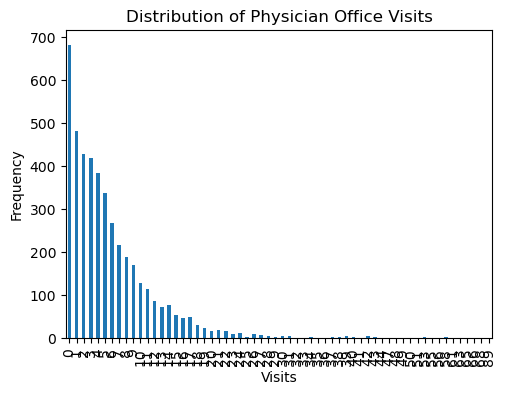

In [88]:
# Plot histogram of 'visits' (equivalent to R's plot(table(df$visits)))
plt.figure(figsize=(5.5, 4))
df['visits'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.title('Distribution of Physician Office Visits')
plt.show()

### Descriptive Statistics

#### Gender

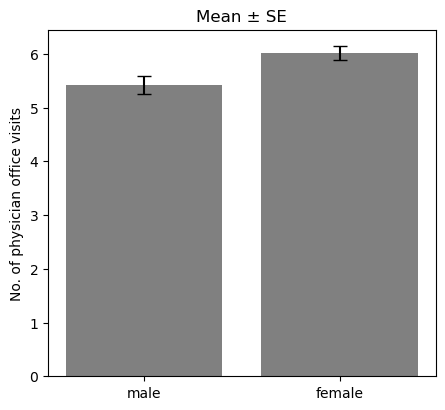

In [89]:
# Descriptive Statistics: Function for Standard Error
def se(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

# Gender summary statistics
summarise_gender = df.groupby('gender')['visits'].agg(
    Mean=lambda x: round(x.mean(), 2),
    Median=lambda x: round(x.median(), 2),
    Min=lambda x: round(x.min(), 2),
    Max=lambda x: round(x.max(), 2),
    SD=lambda x: round(x.std(), 2),
    SE=lambda x: round(se(x), 3)
).reset_index()

# Barplot for gender
plt.figure(figsize=(5, 4.5))
sns.barplot(x='gender', y='Mean', data=summarise_gender, color='gray')
plt.errorbar(x=summarise_gender.index, y=summarise_gender['Mean'], 
             yerr=summarise_gender['SE'], fmt='none', c='black', capsize=5)
plt.ylabel('No. of physician office visits')
plt.xlabel('')
plt.title('Mean ± SE')
plt.gca().invert_xaxis()  # Equivalent to coord_flip()
plt.show()

#### African-American

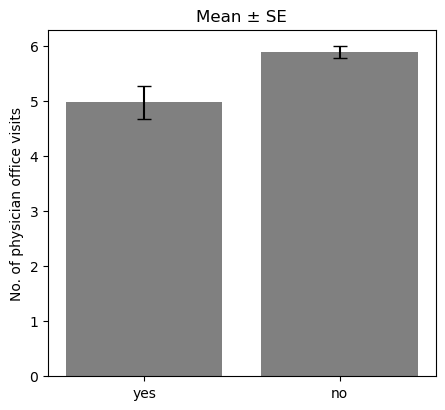

In [90]:
# African-American summary statistics
summarise_afam = df.groupby('afam')['visits'].agg(
    Mean=lambda x: round(x.mean(), 2),
    Median=lambda x: round(x.median(), 2),
    Min=lambda x: round(x.min(), 2),
    Max=lambda x: round(x.max(), 2),
    SD=lambda x: round(x.std(), 2),
    SE=lambda x: round(se(x), 3)
).reset_index()

# Barplot for afam
plt.figure(figsize=(5, 4.5))
sns.barplot(x='afam', y='Mean', data=summarise_afam, color='gray')
plt.errorbar(x=summarise_afam.index, y=summarise_afam['Mean'], 
             yerr=summarise_afam['SE'], fmt='none', c='black', capsize=5)
plt.ylabel('No. of physician office visits')
plt.xlabel('')
plt.title('Mean ± SE')
plt.gca().invert_xaxis()
plt.show()

#### Self-perceived health status

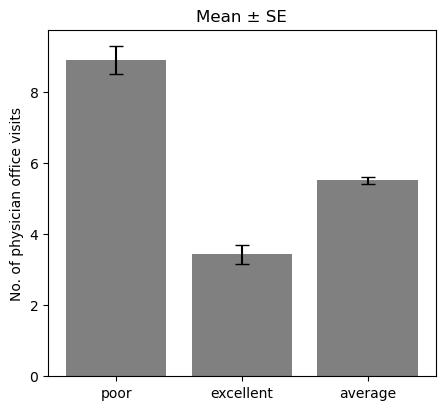

In [91]:
# Health status summary statistics
summarise_health = df.groupby('health')['visits'].agg(
    Mean=lambda x: round(x.mean(), 2),
    Median=lambda x: round(x.median(), 2),
    Min=lambda x: round(x.min(), 2),
    Max=lambda x: round(x.max(), 2),
    SD=lambda x: round(x.std(), 2),
    SE=lambda x: round(se(x), 3)
).reset_index()

# Barplot for health
plt.figure(figsize=(5, 4.5))
sns.barplot(x='health', y='Mean', data=summarise_health, color='gray')
plt.errorbar(x=summarise_health.index, y=summarise_health['Mean'], 
             yerr=summarise_health['SE'], fmt='none', c='black', capsize=5)
plt.ylabel('No. of physician office visits')
plt.xlabel('')
plt.title('Mean ± SE')
plt.gca().invert_xaxis()
plt.show()

### Data Processing

In [92]:
# Data Processing: Convert categorical variables to category type
categorical_cols = ['afam', 'gender', 'health', 'married', 'employed', 'insurance', 'medicaid']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [93]:
# Split data by gender and afam with fixed proportion
tr_prop = 0.70
train_list = []
for _, group in df.groupby(['gender', 'afam']):
    train_group = group.sample(frac=tr_prop, random_state=101)
    train_list.append(train_group)
train = pd.concat(train_list)
test = df[~df.index.isin(train.index)]

# Reset indices
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

/tmp/ipykernel_59277/1152439590.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df.groupby(['gender', 'afam']):


### Check Mean and Variance for Overdispersion

To check for **overdispersion** or **underdispersion** in count data, you can compare the **variance** and **mean** of the response variable (i.e., the count data). Here's how to check for overdispersion and underdispersion:

-   **Poisson Distribution Assumption**: In a standard Poisson model, the mean and variance of the count variable are equal. That is:

    $$ E(Y) = \text{mean} = \lambda, \quad \text{Var}(Y) = \lambda $$

-   **Overdispersion**: Occurs when the variance is greater than the mean: $$ \text{Var}(Y) > E(Y) $$

-   **Underdispersion**: Occurs when the variance is smaller than the mean: $$ text{Var}(Y) < E(Y) $$

In [94]:
# Check Overdispersion
mean_visits = train['visits'].mean()
var_visits = train['visits'].var()
print(f"Mean of visits (train): {mean_visits}")
print(f"Variance of visits (train): {var_visits}")
if var_visits > mean_visits:
    print(">> Overdispersion detected (var > mean)")

Mean of visits (train): 5.857698541329011
Variance of visits (train): 46.5300031321801
>> Overdispersion detected (var > mean)


In [95]:
# Prepare data for models (dummy encode categorical variables)
model_formula = 'visits ~ hospital + C(health) + chronic + age + C(afam) + C(gender) + C(married) + school + income + C(employed) + C(insurance) + C(medicaid)'
train_encoded = train.copy()
test_encoded = test.copy()

# Prepare numerical features for ZIP and ZINB models
numerical_cols = ['hospital', 'chronic', 'age', 'school', 'income']
train_num = sm.add_constant(train[numerical_cols])
test_num = sm.add_constant(test[numerical_cols])

# Prepare dummy-encoded features for hurdle models (all features)
train_hurdle = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test_hurdle = pd.get_dummies(test, columns=categorical_cols, drop_first=True)
# Ensure column consistency between train and test
missing_cols = set(train_hurdle.columns) - set(test_hurdle.columns)
for col in missing_cols:
    test_hurdle[col] = 0
test_hurdle = test_hurdle[train_hurdle.columns]  # Align column order
hurdle_cols = [col for col in train_hurdle.columns if col not in ['visits']]

# Ensure all columns in hurdle_cols are numeric
train_hurdle[hurdle_cols] = train_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce')
test_hurdle[hurdle_cols] = test_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce')
if train_hurdle[hurdle_cols].isna().any().any():
    print("Warning: NaNs detected in train_hurdle. Filling with 0.")
    train_hurdle[hurdle_cols] = train_hurdle[hurdle_cols].fillna(0)
if test_hurdle[hurdle_cols].isna().any().any():
    print("Warning: NaNs detected in test_hurdle. Filling with 0.")
    test_hurdle[hurdle_cols] = test_hurdle[hurdle_cols].fillna(0)

### Fit a Poisson Regression Model

In [96]:
# Fit Poisson Regression Model
pois_mod = smf.glm(formula=model_formula, data=train_encoded, family=sm.families.Poisson()).fit()
print(pois_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                 3085
Model:                            GLM   Df Residuals:                     3071
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12572.
Date:                Wed, 13 Aug 2025   Deviance:                       16123.
Time:                        16:39:28   Pearson chi2:                 2.04e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

In [97]:
# Check Overdispersion
pearson_chi2 = np.sum(pois_mod.pearson_chi2 / pois_mod.df_resid)
print(f"Pearson Chi-Squared / DF (Overdispersion): {pearson_chi2}")
if pearson_chi2 > 1.5:
    print(">> Significant overdispersion")

Pearson Chi-Squared / DF (Overdispersion): 6.653389570891969
>> Significant overdispersion


### Fit Quasi Poisson Model


In [98]:
# Fit Quasi-Poisson Model (approximated)
quasi_pois_mod = smf.glm(formula=model_formula, data=train_encoded, family=sm.families.Poisson()).fit()
dispersion = quasi_pois_mod.pearson_chi2 / quasi_pois_mod.df_resid
print("Quasi-Poisson model fitted (no AIC due to quasi-likelihood)")
print(quasi_pois_mod.summary())

Quasi-Poisson model fitted (no AIC due to quasi-likelihood)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                 3085
Model:                            GLM   Df Residuals:                     3071
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12572.
Date:                Wed, 13 Aug 2025   Deviance:                       16123.
Time:                        16:39:28   Pearson chi2:                 2.04e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

### Fit Negative Binomial Model



In [99]:
# Fit Negative Binomial Model
nb_mod = smf.glm(formula=model_formula, data=train_encoded, family=sm.families.NegativeBinomial()).fit()
print(nb_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                 3085
Model:                            GLM   Df Residuals:                     3071
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8560.2
Date:                Wed, 13 Aug 2025   Deviance:                       3045.2
Time:                        16:39:29   Pearson chi2:                 3.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1373
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/home/zia207/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### Fit Zero-Inflated  Poisson (ZIP) Model



In [100]:
# Fit Zero-Inflated Poisson (ZIP) Model
zip_mod = ZeroInflatedPoisson(endog=train['visits'], exog=train_num, 
                              exog_infl=train_num, inflation='logit').fit(maxiter=100)
print(zip_mod.summary())

Optimization terminated successfully.
         Current function value: 3.762609
         Iterations: 40
         Function evaluations: 48
         Gradient evaluations: 48
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  visits   No. Observations:                 3085
Model:             ZeroInflatedPoisson   Df Residuals:                     3079
Method:                            MLE   Df Model:                            5
Date:                 Wed, 13 Aug 2025   Pseudo R-squ.:                 0.06641
Time:                         16:39:29   Log-Likelihood:                -11608.
converged:                        True   LL-Null:                       -12433.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const     

### Fit Zero-Inflated Negative Binomial (ZINB) Model



In [101]:
## Fit Zero-Inflated Negative Binomial (ZINB) Model
zinb_mod = ZeroInflatedNegativeBinomialP(endog=train['visits'], exog=train_num, 
                                         exog_infl=train_num, inflation='logit').fit(maxiter=100)
print(zinb_mod.summary())

Optimization terminated successfully.
         Current function value: 2.768156
         Iterations: 59
         Function evaluations: 65
         Gradient evaluations: 65
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                            visits   No. Observations:                 3085
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     3079
Method:                                      MLE   Df Model:                            5
Date:                           Wed, 13 Aug 2025   Pseudo R-squ.:                 0.02822
Time:                                   16:39:32   Log-Likelihood:                -8539.8
converged:                                  True   LL-Null:                       -8787.7
Covariance Type:                       nonrobust   LLR p-value:                5.918e-105
                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

### Fit Hurdle Models

First we fit a Hurdle Poisson model, which assumes that the count data follows a Poisson distribution for positive counts and a binary model for the zero counts. Then we fit a Hurdle Negative Binomial model, which allows for overdispersion in the count data while still modeling the excess zeros separately.

#### Fit Hurdle Poisson Model

In [102]:
# Fit Hurdle Poisson Model
# Part 1: Binary classifier (zero vs. positive) using LogisticRegression
train_binary = (train['visits'] > 0).astype(int)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_hurdle[hurdle_cols], train_binary)

# Part 2: Poisson model for positive counts
train_positive = train[train['visits'] > 0].copy()
train_positive_hurdle = train_hurdle[train['visits'] > 0].copy()
# Ensure all columns are numeric
train_positive_hurdle[hurdle_cols] = train_positive_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce')
# Add constant for statsmodels
train_positive_hurdle_const = sm.add_constant(train_positive_hurdle[hurdle_cols])
# Verify no NaNs in input data
if train_positive_hurdle_const.isna().any().any():
    print("Warning: NaNs detected in train_positive_hurdle_const. Filling with 0.")
    train_positive_hurdle_const = train_positive_hurdle_const.fillna(0)

# Ensure purely numeric (float) exog to avoid dtype=object issues in statsmodels
train_positive_hurdle_const = train_positive_hurdle_const.astype(float)

pois_hurdle_mod = sm.GLM(train_positive['visits'], train_positive_hurdle_const, 
                         family=sm.families.Poisson()).fit()
print(pois_hurdle_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                 2631
Model:                            GLM   Df Residuals:                     2617
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10250.
Date:                Wed, 13 Aug 2025   Deviance:                       11479.
Time:                        16:39:32   Pearson chi2:                 1.55e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4943
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5648      0.103  

In [103]:
# Fit Hurdle Negative Binomial Model
nb_hurdle_mod = sm.GLM(train_positive['visits'], train_positive_hurdle_const, 
                       family=sm.families.NegativeBinomial()).fit()
print(nb_hurdle_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                 2631
Model:                            GLM   Df Residuals:                     2617
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7768.5
Date:                Wed, 13 Aug 2025   Deviance:                       1461.7
Time:                        16:39:32   Pearson chi2:                 2.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.08383
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4667      0.287  

/home/zia207/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [104]:
# Custom prediction function for hurdle models
def hurdle_predict(binary_model, count_model, data, cols):
    try:
        # Ensure data is numeric and convert to NumPy array
        data_numeric = data[cols].apply(pd.to_numeric, errors='coerce').fillna(0).values
        data_const = sm.add_constant(data_numeric, has_constant='add')
        # Predict probability of positive counts
        prob_positive = binary_model.predict_proba(data_numeric)[:, 1]
        # Predict counts for positive cases
        count_pred = count_model.predict(data_const)
        # Check for invalid values
        if np.any(np.isnan(prob_positive)) or np.any(np.isinf(prob_positive)):
            print("Warning: Invalid prob_positive values in hurdle_predict")
            prob_positive = np.nan_to_num(prob_positive, nan=0.0, posinf=0.0, neginf=0.0)
        if np.any(np.isnan(count_pred)) or np.any(np.isinf(count_pred)):
            print("Warning: Invalid count_pred values in hurdle_predict")
            count_pred = np.nan_to_num(count_pred, nan=0.0, posinf=0.0, neginf=0.0)
        # Combine predictions
        return prob_positive * count_pred
    except Exception as e:
        print(f"Error in hurdle_predict: {e}")
        return np.full(len(data), np.nan)


### Model Comparison: AIC and Likelihood Ratio Test (LRT)

In [105]:
# Model Comparison: AIC and Likelihood Ratio Test
models = {
    'Poisson': pois_mod,
    'NB': nb_mod,
    'ZIP': zip_mod,
    'ZINB': zinb_mod,
    'Hurdle_Pois': (log_reg, pois_hurdle_mod),
    'Hurdle_NB': (log_reg, nb_hurdle_mod)
}

aic_values = {}
for name, model in models.items():
    if name in ['Hurdle_Pois', 'Hurdle_NB']:
        # Approximate AIC for hurdle models
        binary_loglik = np.sum(log_reg.predict_log_proba(train_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce').fillna(0))[np.arange(len(train_binary)), train_binary])
        count_mod = model[1]
        aic_values[name] = 2 * (count_mod.df_model + len(log_reg.coef_[0]) + 2) - 2 * (count_mod.llf + binary_loglik)
    else:
        aic_values[name] = model.aic
print("AIC Values:")
print(pd.Series(aic_values).round(2))

AIC Values:
Poisson        25172.16
NB             17148.44
ZIP            23239.29
ZINB           17105.52
Hurdle_Pois    22867.84
Hurdle_NB      17904.14
dtype: float64


In [106]:
# Likelihood Ratio Test: Poisson vs Negative Binomial
ll_pois = pois_mod.llf
ll_nb = nb_mod.llf
dof = nb_mod.df_model - pois_mod.df_model
lrt_stat = 2 * (ll_nb - ll_pois)
p_val = chi2.sf(lrt_stat, df=dof)
print("Likelihood Ratio Test: Poisson vs Negative Binomial")
print(f"LR Statistic: {lrt_stat:.3f}")
print(f"p-value: {p_val:.3e}")
if p_val < 0.05:
    print(">> Reject Poisson in favor of Negative Binomial (overdispersion present)")
else:
    print(">> Poisson model sufficient (no significant overdispersion)")

Likelihood Ratio Test: Poisson vs Negative Binomial
LR Statistic: 8023.728
p-value: nan
>> Poisson model sufficient (no significant overdispersion)


### Model Performance Metrics



In [107]:
# Model Performance Metrics
perf_stats = pd.DataFrame({
    'Model': list(models.keys()),
    'AIC': [aic_values[name] for name in models.keys()],
    'LogLik': [np.nan] * len(models),
    'RMSE': [np.nan] * len(models),
    'MAE': [np.nan] * len(models),
    'PseudoR2': [np.nan] * len(models)
})

for i, (name, model) in enumerate(models.items()):
    try:
        if name in ['Poisson', 'NB']:
            pred = model.predict(train_encoded)
        elif name in ['ZIP', 'ZINB']:
            pred = model.predict(train_num)
        else:  # Hurdle models
            binary_mod, count_mod = model
            train_hurdle_numeric = train_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
            pred = hurdle_predict(binary_mod, count_mod, train_hurdle_numeric, hurdle_cols)
        
        obs = train['visits']
        if np.any(np.isnan(pred)) or np.any(np.isinf(pred)):
            print(f"Warning: Invalid predictions (NaN or Inf) detected for model {name}")
            continue
        
        perf_stats.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(obs, pred))
        perf_stats.loc[i, 'MAE'] = mean_absolute_error(obs, pred)
        
        if name not in ['Hurdle_Pois', 'Hurdle_NB']:
            perf_stats.loc[i, 'LogLik'] = model.llf
            try:
                null_model = smf.glm('visits ~ 1', data=train_encoded, family=model.family).fit()
                perf_stats.loc[i, 'PseudoR2'] = 1 - (model.llf / null_model.llf)
            except Exception as e:
                print(f"Warning: Failed to compute PseudoR2 for {name}: {e}")
        else:
            try:
                train_hurdle_numeric = train_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
                binary_loglik = np.sum(binary_mod.predict_log_proba(train_hurdle_numeric)[np.arange(len(train_binary)), train_binary])
                perf_stats.loc[i, 'LogLik'] = count_mod.llf + binary_loglik
            except Exception as e:
                print(f"Warning: Failed to compute LogLik for {name}: {e}")
    except Exception as e:
        print(f"Error processing model {name}: {e}")

print("\n=== Model Performance Metrics ===")
print(perf_stats.round(3))

Error in hurdle_predict: loop of ufunc does not support argument 0 of type float which has no callable exp method
Error in hurdle_predict: loop of ufunc does not support argument 0 of type float which has no callable exp method

=== Model Performance Metrics ===
         Model        AIC     LogLik   RMSE    MAE  PseudoR2
0      Poisson  25172.165 -12572.082  6.433  4.143     0.104
1           NB  17148.437  -8560.218  6.684  4.201     0.026
2          ZIP  23239.294 -11607.647  6.474  4.197       NaN
3         ZINB  17105.525  -8539.762  6.586  4.218       NaN
4  Hurdle_Pois  22867.842        NaN    NaN    NaN       NaN
5    Hurdle_NB  17904.144        NaN    NaN    NaN       NaN


/home/zia207/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/zia207/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [108]:
# Model Performance Metrics
perf_stats = pd.DataFrame({
    'Model': list(models.keys()),
    'AIC': [aic_values[name] for name in models.keys()],
    'LogLik': [np.nan] * len(models),
    'RMSE': [np.nan] * len(models),
    'MAE': [np.nan] * len(models),
    'PseudoR2': [np.nan] * len(models)
})

for i, (name, model) in enumerate(models.items()):
    try:
        if name in ['Poisson', 'NB']:
            pred = model.predict(train_encoded)
        elif name in ['ZIP', 'ZINB']:
            pred = model.predict(train_num)
        else:  # Hurdle models
            binary_mod, count_mod = model
            train_hurdle_numeric = train_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
            pred = hurdle_predict(binary_mod, count_mod, train_hurdle_numeric, hurdle_cols)
        
        obs = train['visits']
        if np.any(np.isnan(pred)) or np.any(np.isinf(pred)):
            print(f"Warning: Invalid predictions (NaN or Inf) detected for model {name}")
            continue
        
        perf_stats.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(obs, pred))
        perf_stats.loc[i, 'MAE'] = mean_absolute_error(obs, pred)
        
        if name not in ['Hurdle_Pois', 'Hurdle_NB']:
            perf_stats.loc[i, 'LogLik'] = model.llf
            try:
                null_model = smf.glm('visits ~ 1', data=train_encoded, family=model.family).fit()
                perf_stats.loc[i, 'PseudoR2'] = 1 - (model.llf / null_model.llf)
            except Exception as e:
                print(f"Warning: Failed to compute PseudoR2 for {name}: {e}")
        else:
            try:
                train_hurdle_numeric = train_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
                binary_loglik = np.sum(binary_mod.predict_log_proba(train_hurdle_numeric)[np.arange(len(train_binary)), train_binary])
                perf_stats.loc[i, 'LogLik'] = count_mod.llf + binary_loglik
            except Exception as e:
                print(f"Warning: Failed to compute LogLik for {name}: {e}")
    except Exception as e:
        print(f"Error processing model {name}: {e}")

print("\n=== Model Performance Metrics ===")
print(perf_stats.round(3))

Error in hurdle_predict: loop of ufunc does not support argument 0 of type float which has no callable exp method
Error in hurdle_predict: loop of ufunc does not support argument 0 of type float which has no callable exp method

=== Model Performance Metrics ===
         Model        AIC     LogLik   RMSE    MAE  PseudoR2
0      Poisson  25172.165 -12572.082  6.433  4.143     0.104
1           NB  17148.437  -8560.218  6.684  4.201     0.026
2          ZIP  23239.294 -11607.647  6.474  4.197       NaN
3         ZINB  17105.525  -8539.762  6.586  4.218       NaN
4  Hurdle_Pois  22867.842        NaN    NaN    NaN       NaN
5    Hurdle_NB  17904.144        NaN    NaN    NaN       NaN


/home/zia207/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/zia207/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Prediction Performance on Test Set

In [109]:
# Prediction Performance on Test Set
pred_test = pd.DataFrame({'true': test['visits']})
for name, model in models.items():
    try:
        if name in ['Poisson', 'NB']:
            pred_test[name] = model.predict(test_encoded)
        elif name in ['ZIP', 'ZINB']:
            # Ensure test_num has the correct shape
            print(f"Shape of test_num for {name}: {test_num.shape}")
            # Workaround for ZIP/ZINB: manually compute predictions
            params = model.params
            k_inflate = model.k_inflate
            params_infl = params[:k_inflate]
            params_main = params[k_inflate:]
            prob_zero = 1 / (1 + np.exp(-np.dot(test_num, params_infl)))  # Logistic probability
            count_pred = np.exp(np.dot(test_num, params_main))  # Poisson/NB count
            pred_test[name] = (1 - prob_zero) * count_pred
        else:  # Hurdle models
            binary_mod, count_mod = model
            test_hurdle_numeric = test_hurdle[hurdle_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
            print(f"Shape of test_hurdle_numeric for {name}: {test_hurdle_numeric.shape}")
            pred_test[name] = hurdle_predict(binary_mod, count_mod, test_hurdle_numeric, hurdle_cols)
        
        if np.any(np.isnan(pred_test[name])) or np.any(np.isinf(pred_test[name])):
            print(f"Warning: Invalid predictions (NaN or Inf) detected for model {name} on test set")
            pred_test[name] = np.nan_to_num(pred_test[name], nan=0.0, posinf=0.0, neginf=0.0)
    except Exception as e:
        print(f"Error predicting with model {name} on test set: {e}")
        pred_test[name] = np.full(len(test), np.nan)

test_perf = pd.DataFrame({
    'Model': list(models.keys()),
    'RMSE': [np.nan] * len(models),
    'MAE': [np.nan] * len(models)
})

for i, name in enumerate(models.keys()):
    try:
        pred = pred_test[name]
        obs = pred_test['true']
        if np.any(np.isnan(pred)) or np.any(np.isinf(pred)):
            print(f"Warning: Invalid predictions for model {name} in metric computation")
            continue
        test_perf.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(obs, pred))
        test_perf.loc[i, 'MAE'] = mean_absolute_error(obs, pred)
    except Exception as e:
        print(f"Error computing metrics for model {name}: {e}")

print("\n=== Test Set Prediction Performance ===")
print(test_perf.round(3))

Shape of test_num for ZIP: (1321, 6)
Error predicting with model ZIP on test set: 'ZeroInflatedPoissonResults' object has no attribute 'k_inflate'
Shape of test_num for ZINB: (1321, 6)
Error predicting with model ZINB on test set: 'ZeroInflatedNegativeBinomialResults' object has no attribute 'k_inflate'
Shape of test_hurdle_numeric for Hurdle_Pois: (1321, 13)
Error in hurdle_predict: loop of ufunc does not support argument 0 of type float which has no callable exp method
Shape of test_hurdle_numeric for Hurdle_NB: (1321, 13)
Error in hurdle_predict: loop of ufunc does not support argument 0 of type float which has no callable exp method

=== Test Set Prediction Performance ===
         Model   RMSE    MAE
0      Poisson  6.318  4.067
1           NB  6.499  4.111
2          ZIP    NaN    NaN
3         ZINB    NaN    NaN
4  Hurdle_Pois  8.649  5.580
5    Hurdle_NB  8.649  5.580


/home/zia207/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/zia207/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Summary and Conclusion

This notebook provided a comprehensive overview of various regression models suitable for count data, particularly in the presence of overdispersion. We explored the Quasi-Poisson, Negative Binomial, and Hurdle regression models, highlighting their unique features and applications.

We began with the Poisson regression model, which serves as the foundation for count data analysis. However, we recognized its limitations when faced with overdispersion, prompting us to investigate alternative approaches. The Quasi-Poisson model emerged as a valuable extension, allowing for greater flexibility by incorporating a dispersion parameter.

Next, we delved into the Negative Binomial regression model, which is particularly effective in addressing overdispersion by introducing an additional parameter to account for variance. This model proved to be a robust alternative to the Poisson framework, especially in scenarios where the mean-variance relationship is not constant.

Throughout the notebook, we provided practical examples and code snippets to illustrate the implementation of these models using Python. We demonstrated how to fit the models, interpret the results, and evaluate their performance using various metrics.

In conclusion, understanding the nuances of Quasi-Poisson, Negative Binomial, and Hurdle regression models is essential for accurately analyzing count data in diverse fields. By leveraging the strengths of each model, researchers can make informed decisions and draw meaningful insights from their data. This notebook serves as a valuable resource for practitioners seeking to enhance their statistical modeling skills and tackle real-world challenges in count data analysis.

## References


1. **Statsmodels GLM Documentation**  
   - Covers Poisson and Negative Binomial models for overdispersion.  
   - [https://www.statsmodels.org/stable/glm.html](https://www.statsmodels.org/stable/glm.html)

2. **Statsmodels Zero-Inflated Models**  
   - Details Zero-Inflated Poisson (ZIP) and Negative Binomial (ZINB) models.  
   - [https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.ZeroInflatedPoisson.html](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.ZeroInflatedPoisson.html)

3. **Towards Data Science: Poisson Regression**  
   - Tutorial on Poisson and Negative Binomial regression with `statsmodels`.  
   - [https://towardsdatascience.com/poisson-regression-in-python-8cfbf1c3c19e](https://towardsdatascience.com/poisson-regression-in-python-8cfbf1c3c19e)

4. **Scikit-learn: Generalized Linear Models**  
   - Poisson regression and Tweedie models for count data.  
   - [https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression)

5. **DataCamp: Regression with Count Data**  
   - Covers Poisson, Negative Binomial, and zero-inflated models with code.  
   - [https://www.datacamp.com/tutorial/regression-with-count-data-in-python](https://www.datacamp.com/tutorial/regression-with-count-data-in-python)

6. **Python for Data Science: Count Data**  
   - Guide on Poisson, Negative Binomial, and Hurdle models.  
   - [https://pythonfordatascience.org/count-data-regression-python/](https://pythonfordatascience.org/count-data-regression-python/)




